# This is Python notebook used for Course 2 - Module 2 ( Investment Assignment)

### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import matplotlib .pyplot as plt

import os
import re

### Reading datasets

In [2]:
companies = pd.read_csv('companies.csv',encoding='palmos')
rounds2 = pd.read_csv('rounds2.csv',encoding='palmos')
mapping = pd.read_csv('mapping.csv')

### Checking the details of datasets

In [3]:
print(companies.info())
print(rounds2.info())
print(mapping.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 

#### Percentages of missing values in companies dataset

In [43]:
companies.isnull().sum()/len(companies.index)*100

permalink        0.00
name             0.00
homepage_url     7.62
category_list    4.74
status           0.00
country_code    10.48
state_code      12.88
region          12.10
city            12.10
founded_at      22.93
dtype: float64

#### Percentages of missing values in rounds2 dataset

In [44]:
rounds2.isnull().sum()/len(rounds2.index)*100

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

## Checkpoints - Part 1

### Checkpoint 1: Data Cleaning

In [4]:
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

**founded_at** column needs a bit processing too. Some of the values don't pass the sanity checks(The company cannot be founded in future, after checking with the website It is found that the values are wrong, e.g. 2914 instead of 2014) or Some value is out of pandas date range( Harvard founded at 1636).

But for the analysis required in checkpoint - part 1, it is not needed now.

### Table 1.1: Understand the Data Set 

#### How many <font color='blue'>unique companies</font> are present in <font color='blue'>rounds2<font>?

In [5]:
rounds2['company_permalink'].nunique()

66368

#### How many <font color='blue'>unique companies</font> are present in <font color='blue'>companies<font>?

In [6]:
companies['permalink'].nunique()

66368

#### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	

In [7]:
np.setdiff1d(rounds2['company_permalink'].unique(),companies['permalink'].unique()).size

0

The answer is no.

#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.

In [8]:
master_frame = pd.merge(companies, rounds2,
                        how = 'inner', 
                        left_on = 'permalink', right_on = 'company_permalink')

#### How many observations are present in master_frame?

In [9]:
master_frame.shape

(114949, 16)

In [10]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


## Checkpoint 2: Funding Type Analysis

#### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

raised_amount_usd                                       
                                 min        mean      median            max
funding_round_type                                                         
angel                           0.00   958694.00   400000.00   494511992.00
private_equity                  0.00 73308593.00 20000000.00  4745460219.00
seed                            0.00   719818.00   275000.00   200000000.00
venture                         0.00 11748949.00  5000000.00 17600000000.00

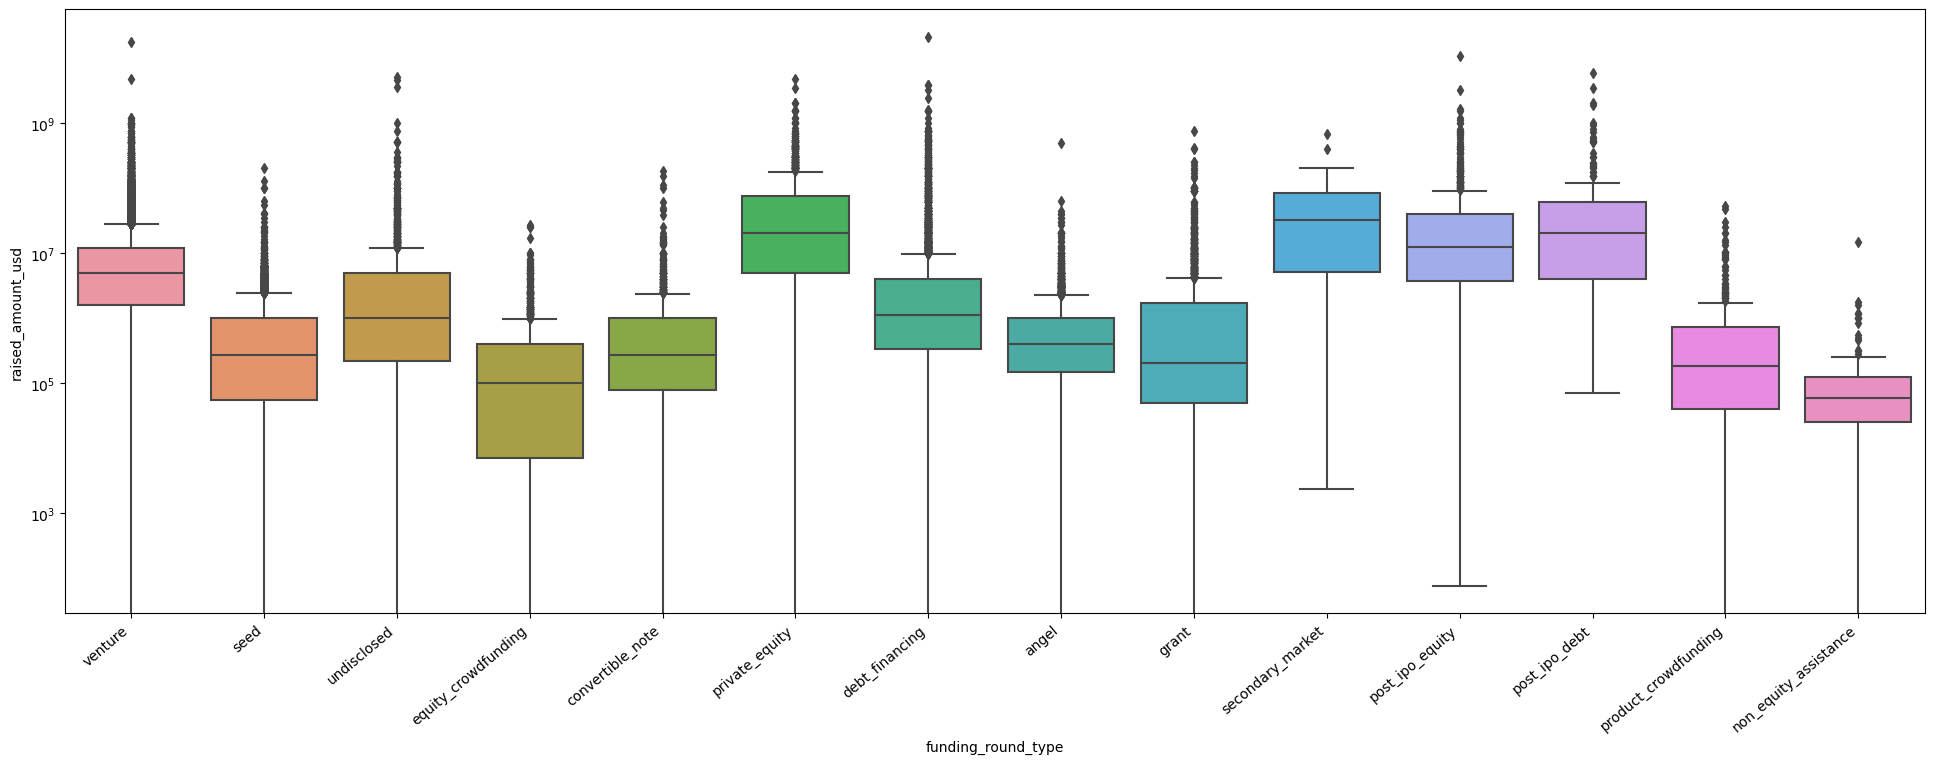

In [65]:
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(24,8),dpi=100)
plt.yscale('log')
bp = sns.boxplot(data=master_frame, x='funding_round_type', y='raised_amount_usd')
bp.set_xticklabels(bp.get_xticklabels(), rotation=40, ha="right")

master_frame[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].groupby('funding_round_type').agg({'raised_amount_usd':['min','mean','median', 'max']}).round()

#### Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

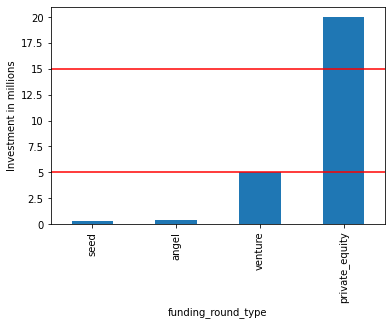

,raised_amount_usd_min,raised_amount_usd_mean,raised_amount_usd_median,raised_amount_usd_max
funding_round_type,,,,
venture,0.00,11748949.00,5000000.00,17600000000.00


In [68]:
funding_stats_frame = master_frame[master_frame.funding_round_type.isin(['venture', 'angel', 'seed', 'private_equity'])].groupby('funding_round_type').agg({'raised_amount_usd':['min','mean','median', 'max']}).round()
funding_stats_frame.columns = ['_'.join(col).strip() for col in funding_stats_frame.columns.values]
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
fig, ax=plt.subplots()
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('Investment in millions')
plt.axhline(y=5_000_000,color='r')
plt.axhline(y=15_000_000,color='r')
funding_stats_frame['raised_amount_usd_median'].sort_values().plot.bar()
plt.show()
funding_stats_frame[(funding_stats_frame['raised_amount_usd_median']>=5_000_000) & (funding_stats_frame['raised_amount_usd_median']<=15_000_000)]


Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, ***venture*** is the most suitable investment type.

## Checkpoints - Part 2

### Checkpoint 3: Country Analysis

In [13]:
venture_summ_frame = master_frame[master_frame.funding_round_type=='venture'].groupby('country_code').agg({'raised_amount_usd':['sum','count']})

In [14]:
venture_summ_frame.columns = ['_'.join(col).strip() for col in venture_summ_frame.columns.values]

venture_summ_frame

,raised_amount_usd_sum,raised_amount_usd_count
country_code,,
ARE,342617539.00,26
ARG,314338819.00,58
ARM,26517500.00,2
AUS,1322934948.00,206
AUT,630954952.00,53
...,...,...
UKR,17792461.00,8
URY,19830000.00,8
USA,422510842796.00,36139


1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

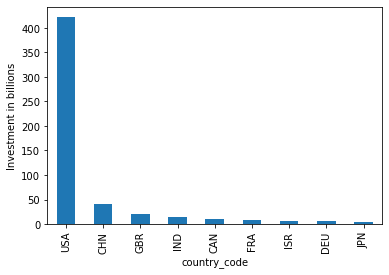

,raised_amount_usd_sum,raised_amount_usd_count
country_code,,
USA,422510842796.00,36139
CHN,39835418773.00,1564
GBR,20245627416.00,2055
IND,14391858718.00,824
CAN,9583332317.00,1256
FRA,7259536732.00,917
ISR,6907514579.00,796
DEU,6346959822.00,558
JPN,3363676611.00,274


In [15]:
top9 = venture_summ_frame.sort_values(['raised_amount_usd_sum','raised_amount_usd_count'],ascending=False)[:9]
scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
fig, ax=plt.subplots()
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('Investment in billions')
top9.raised_amount_usd_sum.plot.bar()
plt.show()
top9

#### The Top 3 English-Speaking Countries
1. United States (USA)
2. United Kingdom (GBR)
3. India (IND)


### Checkpoint 4: Sector Analysis 1

##### Sector analysis

Removing 1st row of mapping because it is used map missing values to Blank sector

In [16]:
mapping = mapping.iloc[1:,:]

In **mapping** file there are the categories which contains the string 'na' was replaced with '0'.

In [17]:
mapping['category_list'] = mapping.category_list.apply(lambda x:x.replace('0','na').lower() if len(re.findall(r'(0\w|\w0)',x))>0 else x.lower())

##### Comverting from wide format to long format

In [18]:
category_list_frame = mapping.melt(id_vars=mapping.columns[0],value_vars=mapping.columns[1:], var_name='sector',value_name='val')

In [19]:
mapping = category_list_frame[category_list_frame.val==1][['category_list', 'sector']].reset_index(drop=True)

In [20]:
venture_frame = master_frame[(master_frame.funding_round_type=='venture') & (master_frame.country_code.isin(['USA','GBR','IND']))]

In [76]:
venture_summ = venture_frame.groupby('country_code').sum()
venture_summ['raised_amount_perc']=venture_summ.raised_amount_usd/venture_summ.raised_amount_usd.sum()*100
venture_summ

,raised_amount_usd,raised_amount_perc
country_code,,
GBR,20245627416.00,4.43
IND,14391858718.00,3.15
USA,422510842796.00,92.42


From Category list we are deriving the primary sub-sector

In [40]:
venture_frame['category_list'].fillna('', inplace=True)
venture_frame.loc[:,'primary_sector'] = venture_frame.category_list.str.split('|').str[0].str.lower()

In [23]:
venture_frame.reset_index(drop=True,inplace=True)

Venure frame is merged with mapping to get the sector for every company

In [24]:
sector_venture_frame = pd.merge(venture_frame, mapping,how='inner', left_on='primary_sector', right_on='category_list')

In [25]:
sector_venture_frame

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,media,media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,media,media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,media,media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,media,media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,media,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41267,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.00,tracking,tracking,Others
41268,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,tracking,tracking,Others
41269,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,tracking,tracking,Others
41270,/organization/ziftit,Ziftit,http://www.ziftit.com,Gift Registries|Shopping,closed,USA,CA,San Diego,San Diego,01-02-2011,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,NaN,09-07-2013,4000000.00,gift registries,gift registries,Others


Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. 

In [26]:
D1 = sector_venture_frame[sector_venture_frame['country_code']=='USA']
D2 = sector_venture_frame[sector_venture_frame['country_code']=='GBR']
D3 = sector_venture_frame[sector_venture_frame['country_code']=='IND']
D1

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,sector
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,media,media,Entertainment
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.00,media,media,Entertainment
6,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.00,media,media,Entertainment
7,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1582300.00,media,media,Entertainment
8,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2000000.00,media,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41267,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.00,tracking,tracking,Others
41268,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.00,tracking,tracking,Others
41269,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.00,tracking,tracking,Others
41270,/organization/ziftit,Ziftit,http://www.ziftit.com,Gift Registries|Shopping,closed,USA,CA,San Diego,San Diego,01-02-2011,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,NaN,09-07-2013,4000000.00,gift registries,gift registries,Others


#### Here we are calculating top 3 sectors for each of the top 3 countries

In [28]:
top3_sector_D1 = D1.groupby(['sector','country_code']).agg({'name':'count','raised_amount_usd':'sum'}).reset_index().rename(columns={'name':'count'}).sort_values('count',ascending=False)[:3]
top3_sector_D1

,sector,country_code,count,raised_amount_usd
6,Others,USA,8767,82822211972.00
1,Cleantech / Semiconductors,USA,8268,119931874301.00
7,"Social, Finance, Analytics, Advertising",USA,7822,86331402349.00


In [29]:
top3_sector_D2 = D2.groupby(['sector','country_code']).agg({'name':'count','raised_amount_usd':'sum'}).reset_index().rename(columns={'name':'count'}).sort_values('count',ascending=False)[:3]
top3_sector_D2

,sector,country_code,count,raised_amount_usd
6,Others,GBR,580,4492219646.00
7,"Social, Finance, Analytics, Advertising",GBR,481,3773328672.00
1,Cleantech / Semiconductors,GBR,466,5073290093.00


In [30]:
top3_sector_D3 = D3.groupby(['sector','country_code']).agg({'name':'count','raised_amount_usd':'sum'}).reset_index().rename(columns={'name':'count'}).sort_values('count',ascending=False)[:3]
top3_sector_D3

,sector,country_code,count,raised_amount_usd
6,Others,IND,332,6329507440.00
7,"Social, Finance, Analytics, Advertising",IND,193,1578804920.00
5,"News, Search and Messaging",IND,154,1739579948.00


#### Here we sort companies in top sector for each country by their total investments

In [77]:
D1[D1['sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False)

,permalink,raised_amount_usd
3952,/organization/social-finance,1365199900.00
3940,/organization/snapchat,1165100000.00
2463,/organization/livingsocial,818225039.00
1519,/organization/facebook,615200000.00
4844,/organization/zenefits,581500000.00
...,...,...
2373,/organization/laser-projection-tech,0.00
4672,/organization/vsocial,0.00
2145,/organization/invine,0.00
4676,/organization/vwise,0.00


In [46]:
D2[D2['sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False)

,permalink,raised_amount_usd
253,/organization/oneweb,500000000.00
139,/organization/farfetch,194500000.00
210,/organization/liquid-telecom,150000000.00
266,/organization/picochip,111500000.00
241,/organization/newvoicemedia,111300000.00
...,...,...
204,/organization/lectrio,0.00
10,/organization/agillic,0.00
146,/organization/flavrbox,0.00
361,/organization/vinopolis,0.00


In [47]:
D3[D3['sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False)

,permalink,raised_amount_usd
71,/organization/flipkart,2451000000.00
179,/organization/snapdeal,310699998.00
189,/organization/tata-teleservices,212000000.00
130,/organization/myntra,158750000.00
148,/organization/pepperfry-com,128000000.00
...,...,...
75,/organization/frontalrain-technologies,0.00
196,/organization/travelkhana-com,0.00
156,/organization/process-9,0.00
95,/organization/i7-networks,0.00


In [48]:
D1[D1['sector']=='Cleantech / Semiconductors'].groupby('permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False)

,permalink,raised_amount_usd
1442,/organization/freescale,17600000000.00
1921,/organization/juno-therapeutics,1159803496.00
523,/organization/better-place,775000000.00
683,/organization/brightsource-energy,582000000.00
1564,/organization/greatpoint-energy,562000000.00
...,...,...
2658,/organization/palma-ceia-semidesign,0.00
874,/organization/clarisay,0.00
452,/organization/auterra,0.00
882,/organization/clean-membranes,0.00


#### Here we sort companies in second best sector for each country by their total investments

In [49]:
D2[D2['sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False)

,permalink,raised_amount_usd
209,/organization/powa-technologies,176700000.00
47,/organization/borro,171572758.00
302,/organization/worldremit,147109000.00
301,/organization/wonga,145393366.00
164,/organization/mereo,119000000.00
...,...,...
92,/organization/echobox,0.00
104,/organization/flubit-limited,0.00
30,/organization/ascots-of-london,0.00
108,/organization/gekko-global-markets,0.00


In [51]:
D3[D3['sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().reset_index().sort_values('raised_amount_usd',ascending=False)

,permalink,raised_amount_usd
106,/organization/shopclues-com,129000000.00
137,/organization/ybrant-digital,103000000.00
138,/organization/yepme-com,88200000.00
13,/organization/bankbazaar,79000000.00
94,/organization/policybazaar,69600000.00
...,...,...
57,/organization/idream-career,0.00
115,/organization/tallenge,0.00
48,/organization/golflan,0.00
47,/organization/glowship,0.00


In [37]:
top3_sector_top3_country_frame_summ = top3_sector_D1.append(top3_sector_D2,ignore_index=True)
top3_sector_top3_country_frame_summ = top3_sector_top3_country_frame_summ.append(top3_sector_D3,ignore_index=True)
top3_sector_top3_country_frame_summ

,sector,country_code,count,raised_amount_usd
0,Others,USA,8767,82822211972.00
1,Cleantech / Semiconductors,USA,8268,119931874301.00
2,"Social, Finance, Analytics, Advertising",USA,7822,86331402349.00
3,Others,GBR,580,4492219646.00
4,"Social, Finance, Analytics, Advertising",GBR,481,3773328672.00
5,Cleantech / Semiconductors,GBR,466,5073290093.00
6,Others,IND,332,6329507440.00
7,"Social, Finance, Analytics, Advertising",IND,193,1578804920.00
8,"News, Search and Messaging",IND,154,1739579948.00


## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

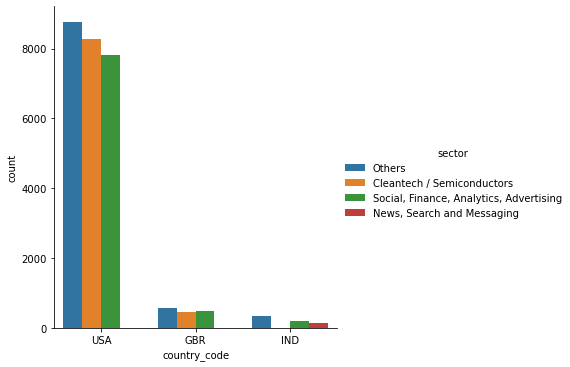

In [38]:
sns.catplot(hue='sector',y='count', x='country_code',kind='bar',ci=None,data=top3_sector_top3_country_frame_summ, sharex=False)

--The END--